In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

(3864, 5796, 3)

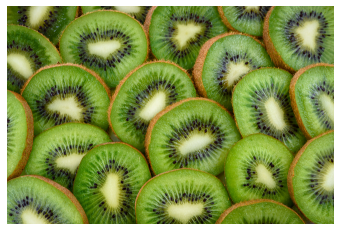

In [2]:
img = plt.imread('sample.jpg')
plt.imshow(img)
plt.axis('off')
img.shape

(-0.5, 0.5, 0.5, -0.5)

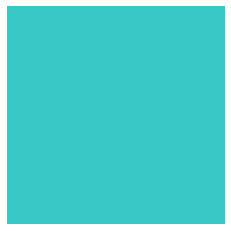

In [3]:
R = 56
B = 200
G = 200
plt.imshow([[np.array([R,G,B]).astype('uint8')]])
plt.axis('off')

In [4]:
#reshpae the image/numpy array
img_flat = img.reshape(img.shape[0]*img.shape[1],3)
print(img_flat.shape)
len(np.unique(img_flat,axis=0))

(22395744, 3)


423522

In [5]:
kmeans = KMeans(n_clusters=20).fit(img_flat)

In [6]:
img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

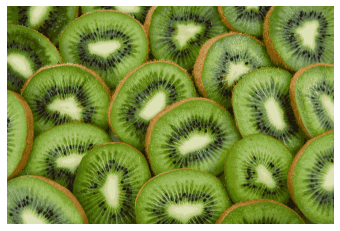

In [7]:
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

In [8]:
import matplotlib
matplotlib.image.imsave('Compressed.jpg', img2)

In [8]:
def image_cluster(img, k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_
### END SOLUTION

In [9]:
### BEGIN SOLUTION
k_vals = list(range(2,21,2))
img_list = []
inertia = []
for k in k_vals:
#    print(k)
    img2, ine = image_cluster(img,k)
    img_list.append(img2)
    inertia.append(ine)  

In [ ]:
# Plot to find optimal number of clusters
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');
### END SOLUTION
